<h1 align="center">DL Assignment: Concrete Strength Assignment (Regression)</h1>

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing import image_dataset_from_directory
from keras import models
from keras import layers
from keras import losses

# Loading Data

Let's, first, load the data into a data frame.

In [80]:
dataset_directory = '/content/drive/MyDrive/datasets/compresive_strength_concrete.csv'

In [81]:
data_df = pd.read_csv(dataset_directory)

In [82]:
data_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Data Preprocessing

There are 1030 samples in the dataset.

In [83]:
data_df.shape

(1030, 9)

## Checking for Missing Values

There are no missing values in the data.

In [84]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

## Checking for Duplicate Data

There are 25 duplicate samples.

In [85]:
duplicate_data = data_df.loc[data_df.duplicated()]
duplicate_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [86]:
duplicate_data.shape

(25, 9)

Removing the duplicates...

In [87]:
data_df.drop_duplicates(inplace=True)

In [88]:
data_df.shape

(1005, 9)

## Data Normalization

First, let's first convert the data type of "Age" column to float64 to make the data homogeneous.

In [89]:
data_df.iloc[:, -2] = data_df.iloc[:, -2].astype(np.float64)

In [90]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1005 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1005 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1005 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1005 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1005 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1005 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1005 non-null   float64
 7   Age (day)                                              1005 non-null   float64
 8   Concrete compressive strength(MPa, megapascals)  

Now, let's map the data in input columns to the range [0, 1]

In [91]:
data_df.iloc[:, :-1] = data_df.iloc[:, :-1] / data_df.std(axis='index')

In [92]:
data_df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,2.670308,0.836054,0.864944,8.532381,1.019133,12.559693,9.617676,0.719494,35.250378
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.284815
min,0.977533,0.000000,0.000000,5.707769,0.000000,10.324870,7.393537,0.015690,2.330000
25%,1.827604,0.000000,0.000000,7.807179,0.000000,12.013457,9.015386,0.109830,23.520000
50%,2.539670,0.232097,0.000000,8.702240,1.030411,12.477496,9.708685,0.439321,33.800000
75%,3.344698,1.653692,1.842450,9.039645,1.689199,13.289565,10.233950,0.878642,44.870000
max,5.175177,4.170786,3.116436,11.574869,5.439220,14.759022,12.354924,5.726865,82.600000


## Separating Data into Training and Test Datasets

Let's, first, shuffle the data.

In [93]:
data_arr = np.asarray(data_df)

In [94]:
np.random.seed(1234)
np.random.shuffle(data_arr)

Now let's prepare the tensors for feeding our model.

In [99]:
x_train = data_arr[:int(data_arr.shape[0] * 0.5), :-1]
y_train = data_arr[:int(data_arr.shape[0] * 0.5), -1]

x_val = data_arr[int(data_arr.shape[0] * 0.5) : int(data_arr.shape[0] * 0.7), :-1]
y_val = data_arr[int(data_arr.shape[0] * 0.5) : int(data_arr.shape[0] * 0.7), -1]

x_test = data_arr[int(data_arr.shape[0] * 0.7):, :-1]
y_test = data_arr[int(data_arr.shape[0] * 0.7):, -1]

In [108]:
num_features = x_train.shape[1]
num_features

8

# Build the Model

In [203]:
def build_model(num_hidden_units=16):
  model = models.Sequential()
  model.add(layers.Dense(num_hidden_units, activation='relu', input_shape=(num_features, )))
  model.add(layers.Dense(num_hidden_units, activation='relu'))
  model.add(layers.Dense(1))

  model.compile(
    optimizer='rmsprop',
    loss=losses.mse,
    metrics=['mae']
  )

  return model

In [204]:
def smooth_curve(points, factor=0.9):
  smoothed_points = np.zeros_like(points)
  for i, point in enumerate(points):
    if i > 0:
      previous = smoothed_points[i - 1]
      smoothed_points[i] = previous * factor + point * (1- factor)
    else:
      smoothed_points[0] = point
  
  return smoothed_points

## Exp1: Hidden Units = 2

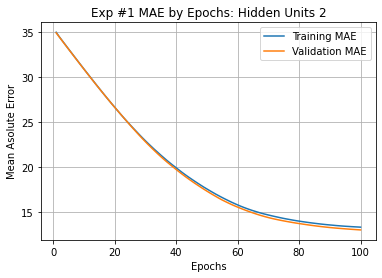

Validation MAE after 100 Epochs: 13.0050


In [205]:
exp_num = 1
num_epochs = 100
num_hidden_units = 2
batch_size = 1

model1 = build_model(num_hidden_units)
history1 = model1.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_1 = history1.history['mae']
val_mae_1 = history1.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_1)
plt.plot(range(1, num_epochs+1), val_mae_1)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after 100 Epochs: {v:.4f}".format(v=val_mae_1[-1]))

## Exp2: Hidden Units = 4

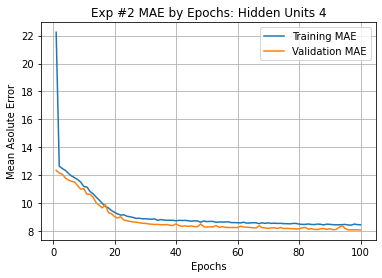

Validation MAE after 100 Epochs: 8.0699


In [206]:
exp_num = 2
num_epochs = 100
num_hidden_units = 4
batch_size = 1

model2 = build_model(num_hidden_units)
history2 = model2.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_2 = history2.history['mae']
val_mae_2 = history2.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_2)
plt.plot(range(1, num_epochs+1), val_mae_2)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after 100 Epochs: {v:.4f}".format(v=val_mae_2[-1]))

## Exp3: Hidden Units = 8

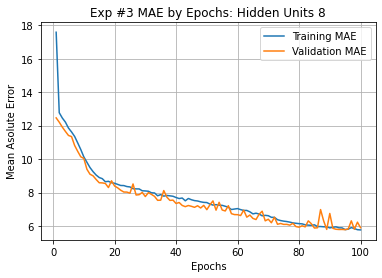

Validation MAE after 100 Epochs: 5.8964


In [207]:
exp_num = 3
num_epochs = 100
num_hidden_units = 8
batch_size = 1

model3 = build_model(num_hidden_units)
history3 = model3.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_3 = history3.history['mae']
val_mae_3 = history3.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_3)
plt.plot(range(1, num_epochs+1), val_mae_3)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after 100 Epochs: {v:.4f}".format(v=val_mae_3[-1]))


## Exp4: Hidden Units = 16

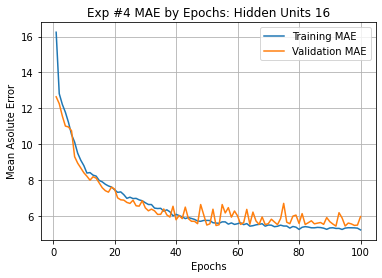

Validation MAE after 100 Epochs: 5.9658


In [208]:
exp_num = 4
num_epochs = 100
num_hidden_units = 16
batch_size = 1

model4 = build_model(num_hidden_units)
history4 = model4.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_4 = history4.history['mae']
val_mae_4 = history4.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_4)
plt.plot(range(1, num_epochs+1), val_mae_4)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after 100 Epochs: {v:.4f}".format(v=val_mae_4[-1]))

## Exp5: Hidden Units = 32

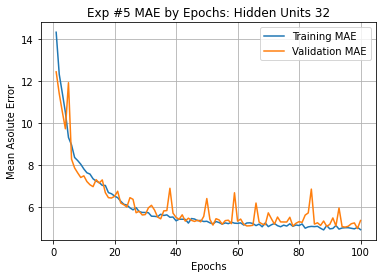

Validation MAE after 100 Epochs: 5.3395


In [209]:
exp_num = 5
num_epochs = 100
num_hidden_units = 32
batch_size = 1

model5 = build_model(num_hidden_units)
history5 = model5.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_5 = history5.history['mae']
val_mae_5 = history5.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_5)
plt.plot(range(1, num_epochs+1), val_mae_5)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after 100 Epochs: {v:.4f}".format(v=val_mae_5[-1]))

## Exp6: Hidden Units = 64

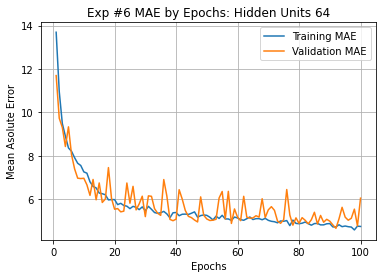

Validation MAE after 100 Epochs: 6.0500


In [210]:
exp_num = 6
num_epochs = 100
num_hidden_units = 64
batch_size = 1

model6 = build_model(num_hidden_units)
history6 = model6.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_6 = history6.history['mae']
val_mae_6 = history6.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_6)
plt.plot(range(1, num_epochs+1), val_mae_6)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after 100 Epochs: {v:.4f}".format(v=val_mae_6[-1]))

## Exp7: Hidden Units = 128

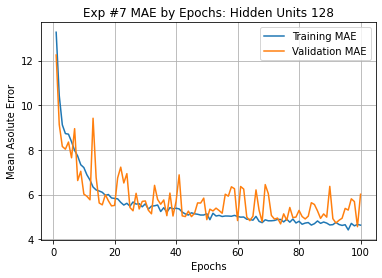

Validation MAE after 100 Epochs: 6.0120


In [211]:
exp_num = 7
num_epochs = 100
num_hidden_units = 128
batch_size = 1

model7 = build_model(num_hidden_units)
history7 = model7.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_7 = history7.history['mae']
val_mae_7 = history7.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_7)
plt.plot(range(1, num_epochs+1), val_mae_7)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after 100 Epochs: {v:.4f}".format(v=val_mae_7[-1]))

## Exp8: Hidden Units = 256

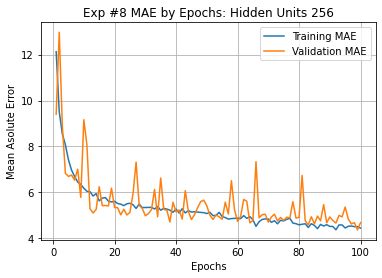

Validation MAE after 100 Epochs: 4.6824


In [212]:
exp_num = 8
num_epochs = 100
num_hidden_units = 256
batch_size = 1

model8 = build_model(num_hidden_units)
history8 = model8.fit(
  x_train,
  y_train,
  epochs=num_epochs,
  batch_size=batch_size,
  validation_data=(x_val, y_val),
  verbose=False
)

train_mae_8 = history8.history['mae']
val_mae_8 = history8.history['val_mae']

plt.clf()
plt.plot(range(1, num_epochs+1), train_mae_8)
plt.plot(range(1, num_epochs+1), val_mae_8)
plt.title('Exp #{e} MAE by Epochs: Hidden Units {u}'.format(
  e=exp_num, u=num_hidden_units
))
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend(['Training MAE', 'Validation MAE'])
plt.grid()
plt.show()

print("Validation MAE after 100 Epochs: {v:.4f}".format(v=val_mae_8[-1]))

## Comparing the Results for Varying Number of Hidden Units

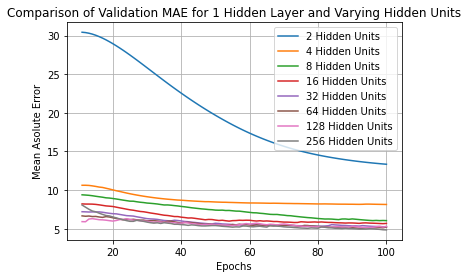

In [236]:
total_experiments = 8
plt.clf()
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_1[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_2[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_3[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_4[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_5[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_6[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_7[10:]))
plt.plot(range(11, num_epochs+1), smooth_curve(val_mae_8[10:]))
plt.title('Comparison of Validation MAE for 1 Hidden Layer and Varying Hidden Units')
plt.xlabel('Epochs')
plt.ylabel('Mean Asolute Error')
plt.legend([
  '{units} Hidden Units'.format(units=2**i) for i in range(1, total_experiments + 1)
], loc='upper right')
plt.grid()
plt.show()

After comparing the results of these models, it can be seen that the model in experiment 8 with 256 hidden units performs best.

# Final Model

In [267]:
model = build_model(num_hidden_units=256)

In [268]:
model.fit(
  x_train,
  y_train,
  epochs=100,
  batch_size=1,
  verbose=0
)

In [269]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 40.4235 - mae: 4.5041


[40.42353820800781, 4.5041375160217285]